In [1]:
import numpy                 as     np
import pylab                 as     pl
import matplotlib.pyplot     as     plt
import astropy.io.fits       as     fits
import requests
import matplotlib.pyplot     as     plt
import healpy                as     hp

from   PIL                   import Image
from   io                    import BytesIO
from   desitarget.targetmask import desi_mask, bgs_mask, mws_mask
from   desitarget.io         import read_targets_in_tiles
from   desitarget.geomask    import circles
from   astropy.table         import Table, vstack
from   desimodel.focalplane  import get_tile_radius_deg
from   desitarget.io         import read_targets_in_hp
from   desitarget.cuts       import random_fraction_of_trues

# BGS Main Selection

In [2]:
def flux2mag(cat, band='R', fiber=False, fibertot=False):
    if fiber:    
        return 22.5 - 2.5 * np.log10(cat['FIBERFLUX_{}'.format(band)].clip(1e-7) / cat['MW_TRANSMISSION_{}'.format(band)])
    
    elif fibertot==True:
        return 22.5 - 2.5 * np.log10(cat['FIBERTOTFLUX_{}'.format(band)].clip(1e-7) / cat['MW_TRANSMISSION_{}'.format(band)])
    
    else:
        
        ]]]]]]\\\\\\\\\\\\\\\\]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]\]]]]]]]]]]]]\\\\\\\\\]\\
        return 22.5 - 2.5 * np.log10(cat['FLUX_{}'.format(band)].clip(1e-7) / cat['MW_TRANSMISSION_{}'.format(band)])

In [3]:
def bgs_faintem(cat, sel=True):
    g  = flux2mag(cat, band='G', fiber=False)
    r  = flux2mag(cat, band='R', fiber=False)
    z  = flux2mag(cat, band='Z', fiber=False)
    w1 = flux2mag(cat, band='W1', fiber=False)
    
    rfib = flux2mag(cat, band='R', fiber=True)
    
    color = (z - w1) - 3./2.5 * (g - r) + 1.2

    if sel:
        return  (rfib < 20.75) | ((rfib < 21.5) & (color > 0.))
    
    else:
        return  color

In [4]:
tdir = '/global/cscratch1/sd/adamyers/dr9/0.57.2.dev4832/targets/main/resolve/bright/'

In [5]:
dat = fits.open('/global/cscratch1/sd/adamyers/dr9/0.57.2.dev4832/targets/main/resolve/bright/targets-bright-hp-265.fits')

In [6]:
dat[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  975 / width of table in bytes                        
NAXIS2  =                  503 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                  108 / number of fields in each row                   
TTYPE1  = 'RELEASE '           / label for field   1                            
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'BRICKID '           / label for field   2                            
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE3  = 'BRICKNAME'       

In [7]:
pixlist = np.random.randint(0, high=700, size=85)
pixlist

array([589,  73, 567, 394, 209, 574, 421, 188, 416, 210, 584, 136, 538,
        10, 519,  45, 112, 516, 559, 132, 677,  29, 405,  17, 336, 297,
       240, 331, 124, 187, 377,  19, 246, 652, 506, 425, 685, 431, 433,
        33, 206, 552, 140, 119, 139, 587, 189,  66, 599, 129, 345, 451,
       459, 610, 156, 614, 272, 345, 119, 252, 239, 201, 437, 649, 367,
       203, 191, 394, 666,  14,  32, 277, 253, 533, 483, 431, 256, 691,
       649, 233, 673, 185,  60, 165, 406])

In [8]:
npix    = len(pixlist)
targets = []

for pix in pixlist:
    fname   = '/global/cscratch1/sd/adamyers/dr9/0.57.2.dev4832/targets/main/resolve/bright/targets-bright-hp-{:d}.fits'.format(pix)
    
    try:
        tt  =  Table.read(fname, 'TARGETS')
        
        targets.append(tt)    
        
        print('Retrieved hp {:d} of {:d} targets'.format(pix, len(tt)))
        
    except:
        npix -= 1
        
        continue

Retrieved hp 73 of 158029 targets
Retrieved hp 567 of 123719 targets
Retrieved hp 394 of 50 targets
Retrieved hp 209 of 247016 targets
Retrieved hp 574 of 110808 targets
Retrieved hp 421 of 126425 targets
Retrieved hp 188 of 135833 targets
Retrieved hp 416 of 1190 targets
Retrieved hp 210 of 179588 targets
Retrieved hp 136 of 132600 targets
Retrieved hp 538 of 126750 targets
Retrieved hp 10 of 134608 targets
Retrieved hp 519 of 177389 targets
Retrieved hp 112 of 131276 targets
Retrieved hp 516 of 639 targets
Retrieved hp 559 of 111312 targets
Retrieved hp 132 of 181769 targets
Retrieved hp 29 of 16376 targets
Retrieved hp 405 of 170875 targets
Retrieved hp 297 of 181747 targets
Retrieved hp 331 of 16660 targets
Retrieved hp 124 of 145857 targets
Retrieved hp 187 of 127580 targets
Retrieved hp 506 of 270830 targets
Retrieved hp 425 of 141408 targets
Retrieved hp 431 of 128557 targets
Retrieved hp 433 of 124329 targets
Retrieved hp 33 of 157351 targets
Retrieved hp 552 of 124330 targets


In [9]:
len(pixlist), npix

(85, 54)

In [10]:
targets = vstack(targets)

In [11]:
targets

<Table length=7083713>
RELEASE BRICKID BRICKNAME BRICK_OBJID ... PRIORITY_INIT NUMOBS_INIT HPXPIXEL
                                      ...                                   
 int16   int32    bytes8     int32    ...     int64        int64     int64  
------- ------- --------- ----------- ... ------------- ----------- --------
   9010  416382  1289p150          54 ...          1500           1     4672
   9010  416382  1289p150          60 ...          1500           1     4672
   9010  416382  1289p150          79 ...          1500           1     4672
   9010  416382  1289p150         377 ...          1400           1     4672
   9010  416382  1289p150         588 ...          1500           1     4672
   9010  416382  1289p150         610 ...          2000           1     4672
   9010  416382  1289p150         844 ...          2000           1     4672
   9010  416382  1289p150         847 ...          1500           1     4672
   9010  416382  1289p150         873 ...          1500           1     4672
    ...     ...       ...         ... ...           ...         ...      ...
   9010  329780  2131m002        4729 ...          2000           1    26005
   9010  329780  2131m002        4745 ...          1500           1    26005
   9010  329780  2131m002        4764 ...          1400           1    26005
   9010  329780  2131m002        4781 ...          2100           1    26005
   9010  329780  2131m002        4815 ...          2100           1    26005
   9010  329780  2131m002        4826 ...          1400           1    26005
   9010  329780  2131m002        4840 ...          1400           1    26005
   9010  329780  2131m002        4845 ...          1400           1    26005
   9010  329780  2131m002        4923 ...          1500           1    26005
   9010  329780  2131m002        4964 ...          2100           1    26005

In [12]:
for x in targets.dtype.names:
    print(x)

RELEASE
BRICKID
BRICKNAME
BRICK_OBJID
MORPHTYPE
RA
RA_IVAR
DEC
DEC_IVAR
DCHISQ
EBV
FLUX_G
FLUX_R
FLUX_Z
FLUX_IVAR_G
FLUX_IVAR_R
FLUX_IVAR_Z
MW_TRANSMISSION_G
MW_TRANSMISSION_R
MW_TRANSMISSION_Z
FRACFLUX_G
FRACFLUX_R
FRACFLUX_Z
FRACMASKED_G
FRACMASKED_R
FRACMASKED_Z
FRACIN_G
FRACIN_R
FRACIN_Z
NOBS_G
NOBS_R
NOBS_Z
PSFDEPTH_G
PSFDEPTH_R
PSFDEPTH_Z
GALDEPTH_G
GALDEPTH_R
GALDEPTH_Z
FLUX_W1
FLUX_W2
FLUX_W3
FLUX_W4
FLUX_IVAR_W1
FLUX_IVAR_W2
FLUX_IVAR_W3
FLUX_IVAR_W4
MW_TRANSMISSION_W1
MW_TRANSMISSION_W2
MW_TRANSMISSION_W3
MW_TRANSMISSION_W4
ALLMASK_G
ALLMASK_R
ALLMASK_Z
FIBERFLUX_G
FIBERFLUX_R
FIBERFLUX_Z
FIBERTOTFLUX_G
FIBERTOTFLUX_R
FIBERTOTFLUX_Z
REF_EPOCH
WISEMASK_W1
WISEMASK_W2
MASKBITS
LC_FLUX_W1
LC_FLUX_W2
LC_FLUX_IVAR_W1
LC_FLUX_IVAR_W2
LC_NOBS_W1
LC_NOBS_W2
LC_MJD_W1
LC_MJD_W2
SHAPE_R
SHAPE_E1
SHAPE_E2
SHAPE_R_IVAR
SHAPE_E1_IVAR
SHAPE_E2_IVAR
SERSIC
SERSIC_IVAR
REF_ID
REF_CAT
GAIA_PHOT_G_MEAN_MAG
GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR
GAIA_PHOT_BP_MEAN_MAG
GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR

In [13]:
for name in desi_mask.names():
    print('{} \t {}'.format(name.ljust(16), np.count_nonzero((targets['DESI_TARGET'] & desi_mask[name]) != 0)))

LRG              	 185230
ELG              	 2317
QSO              	 18700
QSO_HIZ          	 0
ELG_LOP          	 2108
ELG_HIP          	 206
ELG_VLO          	 209
LRG_NORTH        	 48019
ELG_NORTH        	 625
QSO_NORTH        	 5362
ELG_LOP_NORTH    	 558
ELG_VLO_NORTH    	 67
LRG_SOUTH        	 137211
ELG_SOUTH        	 1692
QSO_SOUTH        	 13338
ELG_LOP_SOUTH    	 1550
ELG_VLO_SOUTH    	 142
SKY              	 0
STD_FAINT        	 213497
STD_WD           	 11005
STD_BRIGHT       	 109601
BAD_SKY          	 0
SUPP_SKY         	 0
NO_TARGET        	 0
BRIGHT_OBJECT    	 0
IN_BRIGHT_OBJECT 	 0
NEAR_BRIGHT_OBJECT 	 0
BGS_ANY          	 3270965
MWS_ANY          	 3808155
SCND_ANY         	 0


In [14]:
for name in bgs_mask.names():
    print('{} \t {}'.format(name.ljust(16), np.count_nonzero((targets['BGS_TARGET'] & bgs_mask[name]) != 0)))

BGS_FAINT        	 1241412
BGS_BRIGHT       	 2022439
BGS_WISE         	 7114
BGS_FAINT_HIP    	 248626
BGS_FAINT_NORTH  	 328514
BGS_BRIGHT_NORTH 	 528216
BGS_WISE_NORTH   	 1998
BGS_FAINT_SOUTH  	 912898
BGS_BRIGHT_SOUTH 	 1494223
BGS_WISE_SOUTH   	 5116


In [15]:
# bgs_mask.names()

In [16]:
# targets.dtype.names

In [17]:
np.unique(targets['PRIORITY_INIT'], return_counts=True)

(<Column name='PRIORITY_INIT' dtype='int64' length=8>
   -1
 1400
 1500
 1550
 1600
 2000
 2100
 2998,
 array([   5839, 1552400, 2233708,    4843,    4959,  999899, 2271060,
          11005]))

In [19]:
100. * 11005. / 2271060.

0.48457548457548455

In [20]:
bgs_any = targets[(targets['DESI_TARGET'] & desi_mask['BGS_ANY'])      != 0]

In [21]:
mws_any = targets[(targets['DESI_TARGET'] & desi_mask['MWS_ANY'])      != 0]

In [22]:
bright  = targets[(targets['BGS_TARGET']  & bgs_mask['BGS_BRIGHT'])    != 0]
faint   = targets[(targets['BGS_TARGET']  & bgs_mask['BGS_FAINT'])     != 0]
wise    = targets[(targets['BGS_TARGET']  & bgs_mask['BGS_WISE'])      != 0]
hip     = targets[(targets['BGS_TARGET']  & bgs_mask['BGS_FAINT_HIP']) != 0]

In [107]:
sga     = bgs_any[bgs_any['REF_CAT'] == 'L3']

In [83]:
assert np.all(np.isin(hip['TARGETID'], faint['TARGETID']))

In [38]:
nbright = len(bright) 

for x in [bright, faint, hip, wise]:
    print('{:.6f}'.format(len(x) / nbright))

1.000000
0.613819
0.122934
0.003518


In [24]:
540. + 860.

1400.0

In [24]:
540. / 860. 

0.627906976744186

In [25]:
0.2 * 540. / 860. 

0.12558139534883722

In [26]:
3. / 860. 

0.0034883720930232558

In [27]:
len(bgs_any)

3270965

In [29]:
np.unique(bright['PRIORITY_INIT'], return_counts=True)

(<Column name='PRIORITY_INIT' dtype='int64' length=2>
 2100
 2998,
 array([2022434,       5]))

In [30]:
np.unique(bgs_any['PRIORITY_INIT'], return_counts=True)

(<Column name='PRIORITY_INIT' dtype='int64' length=3>
 2000
 2100
 2998,
 array([ 999899, 2271060,       6]))

In [31]:
np.unique(bgs_any['NUMOBS_INIT'], return_counts=True)

(<Column name='NUMOBS_INIT' dtype='int64' length=1>
 1,
 array([3270965]))

In [32]:
np.unique(bgs_any['OBSCONDITIONS'], return_counts=True)

(<Column name='OBSCONDITIONS' dtype='int64' length=2>
 516
 517,
 array([3083221,  187744]))

In [33]:
for band in ['G', 'R', 'Z']:
    print(np.count_nonzero(bgs_any['NOBS_{}'.format(band)] == 0))

14
6
6


In [34]:
np.unique(faint['PRIORITY_INIT'], return_counts=True)

(<Column name='PRIORITY_INIT' dtype='int64' length=2>
 2000
 2100,
 array([992786, 248626]))

In [36]:
# Promoted fraction of 20%.
len(hip) / len(faint)

0.20027678160030674

In [41]:
248626. / (992786. + 248626.)

0.20027678160030674

In [37]:
np.unique(bright['PRIORITY_INIT'], return_counts=True)

(<Column name='PRIORITY_INIT' dtype='int64' length=2>
 2100
 2998,
 array([2022434,       5]))

In [129]:
np.unique(wise['PRIORITY_INIT'], return_counts=True)

(<Column name='PRIORITY_INIT' dtype='int64' length=1>
 2000,
 array([3054]))

In [130]:
np.unique(hip['PRIORITY_INIT'], return_counts=True)

(<Column name='PRIORITY_INIT' dtype='int64' length=1>
 2100,
 array([104290]))

In [43]:
np.unique(mws_any['PRIORITY_INIT'], return_counts=True)

(<Column name='PRIORITY_INIT' dtype='int64' length=7>
 1400
 1500
 1550
 1600
 2000
 2100
 2998,
 array([1552400, 2233708,    4843,    4959,    1064,     176,   11005]))

In [89]:
# All priority clashes are BGS OR WD. 
mws_clash = mws_any[(mws_any['PRIORITY_INIT'] >= 2000) & (mws_any['PRIORITY_INIT'] != 2998)]

In [90]:
np.mean(np.isin(mws_clash['TARGETID'], bgs_any['TARGETID']))

1.0

In [88]:
mws_mask.names()

['MWS_BROAD',
 'MWS_WD',
 'MWS_NEARBY',
 'MWS_BROAD_NORTH',
 'MWS_BROAD_SOUTH',
 'MWS_BHB',
 'MWS_MAIN_BLUE',
 'MWS_MAIN_BLUE_NORTH',
 'MWS_MAIN_BLUE_SOUTH',
 'MWS_MAIN_RED',
 'MWS_MAIN_RED_NORTH',
 'MWS_MAIN_RED_SOUTH',
 'MWS_FAINT_BLUE',
 'MWS_FAINT_BLUE_NORTH',
 'MWS_FAINT_BLUE_SOUTH',
 'MWS_FAINT_RED',
 'MWS_FAINT_RED_NORTH',
 'MWS_FAINT_RED_SOUTH',
 'GAIA_STD_FAINT',
 'GAIA_STD_WD',
 'GAIA_STD_BRIGHT',
 'BACKUP_BRIGHT',
 'BACKUP_FAINT',
 'BACKUP_VERY_FAINT']

In [102]:
100. * np.count_nonzero(mws_any['PRIORITY_INIT'] == 2998) / len(bright)

0.5441449655589118

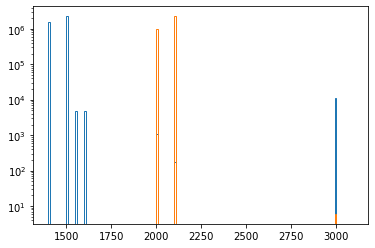

In [103]:
pl.hist(mws_any['PRIORITY_INIT'], histtype='step', bins=np.arange(1400., 3100., 10.), label='MWS_ANY')
pl.hist(bgs_any['PRIORITY_INIT'], histtype='step', bins=np.arange(1400., 3100., 10.), label='BGS_ANY')
pl.yscale('log')

Text(0.5, 0, 'SUBPRIORITY')

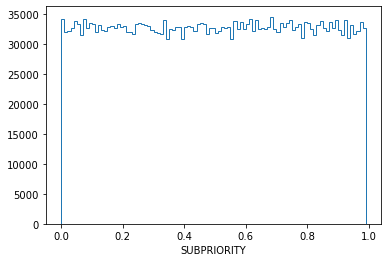

In [99]:
_ = pl.hist(bgs_any['SUBPRIORITY'], histtype='step', bins=np.arange(0.0, 1.0, 0.01))
pl.xlabel('SUBPRIORITY')

### No BRIGHT | CLUSTER

In [44]:
# 0	NPRIMARY	touches a pixel that is outside the BRICK_PRIMARY region of a brick
# 1	BRIGHT	touches a pixel within the locus of a radius-magnitude relation for Tycho-2 stars or one for Gaia DR2 stars to G < 13
# 2	SATUR_G	touches a pixel that was saturated in at least one -band image
# 3	SATUR_R	touches a pixel that was saturated in at least one -band image
# 4	SATUR_Z	touches a pixel that was saturated in at least one -band image
# 5	ALLMASK_G	touches a pixel that has any of the ALLMASK_G bits set
# 6	ALLMASK_R	touches a pixel that has any of the ALLMASK_R bits set
# 7	ALLMASK_Z	touches a pixel that has any of the ALLMASK_Z bits set
# 8	WISEM1	touches a pixel in a WISEMASK_W1 bright star mask
# 9	WISEM2	touches a pixel in a WISEMASK_W2 bright star mask
# 10 BAILOUT	touches a pixel in a blob where we "bailed out" of source fitting
# 11 MEDIUM	touches a pixel within the locus of a radius-magnitude relation for Gaia DR2 stars to G < 16
# 12 GALAXY	touches a pixel in an SGA large galaxy
# 13 CLUSTER	touches a pixel in a globular cluster

for i in np.arange(14):
    print('{}\t{:e}'.format(i, np.mean((bgs_any['MASKBITS'] & 2**i) != 0)))

0	1.391027e-04
1	0.000000e+00
2	2.565298e-03
3	3.643879e-03
4	5.929137e-03
5	1.747191e-03
6	2.072171e-03
7	2.042517e-03
8	2.913269e-02
9	1.293747e-02
10	0.000000e+00
11	4.320132e-02
12	2.053706e-02
13	0.000000e+00


In [45]:
for i in np.arange(10):
    print('{:d}\t{}\t{}'.format(i, (516 & 2**i) != 0, (517 & 2**i) != 0))

0	False	True
1	False	False
2	True	True
3	False	False
4	False	False
5	False	False
6	False	False
7	False	False
8	False	False
9	True	True


In [46]:
for nside in [2, 4, 8, 16, 32, 64]:
    hp_area = hp.pixelfunc.nside2pixarea(nside, degrees=True)

    print('{:d}\t{:.4f}\t{:.4f}\t{:.4f}'.format(nside, hp_area, len(bright) / (hp_area * npix), len(faint) / (hp_area * npix)))

2	859.4367	43.5780	26.7490
4	214.8592	174.3122	106.9962
8	53.7148	697.2488	427.9847
16	13.4287	2788.9951	1711.9389
32	3.3572	11155.9805	6847.7556
64	0.8393	44623.9219	27391.0225


In [47]:
np.count_nonzero(np.isin(hip['TARGETID'], faint['TARGETID'])), len(hip)

(248626, 248626)

In [48]:
bass_offset = 0.04

In [49]:
# https://desi.lbl.gov/trac/wiki/SurveyOps/SurveySpeed: 0.583
psf_fiberfrac_nominal = 0.7771901

Text(0.5, 1.0, 'No FMC to SGA')

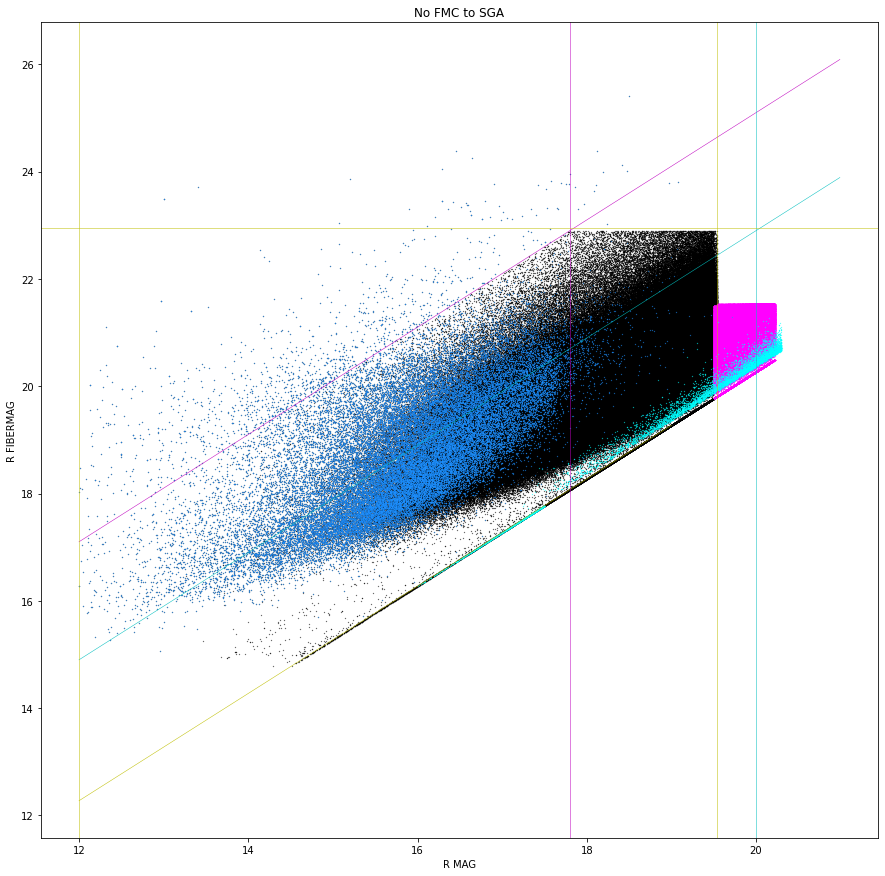

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.plot(flux2mag(bright, fiber=False), flux2mag(bright, fiber=True), c='k', marker='.', markersize=.5, lw=0.0)
ax.plot(flux2mag(faint,  fiber=False), flux2mag(faint,  fiber=True), c='magenta',       marker='.', markersize=.5, lw=0.0)
ax.plot(flux2mag(wise,   fiber=False), flux2mag(wise,   fiber=True), c='cyan',          marker='.', markersize=.5, lw=0.0)
ax.plot(flux2mag(sga,    fiber=False), flux2mag(sga,    fiber=True), c='dodgerblue',    marker='.', markersize=.5, lw=0.0)

ax.plot(np.arange(12., 19.7), np.arange(12., 19.7) -2.5 * np.log10(psf_fiberfrac_nominal), c='y', lw=0.5)

rs = np.arange(12, 21, 0.01)

ax.plot(rs, 22.9 + (rs - 17.8), c='m', lw=0.5)
ax.axvline(17.8, c='m', lw=0.5)

ax.plot(rs, 2.9 + rs, c='c', lw=0.5)
ax.axvline(20.0, c='c', lw=0.5)

ax.axvline(19.5 + bass_offset, lw=0.5, c='y')
ax.axhline(22.9 + bass_offset, lw=0.5, c='y')

ax.axvline(12.0, lw=0.5, c='y')

ax.set_xlabel('R MAG')
ax.set_ylabel('R FIBERMAG')

ax.set_title('No FMC to SGA')

Text(0.5, 0, 'FIBERTOTR')

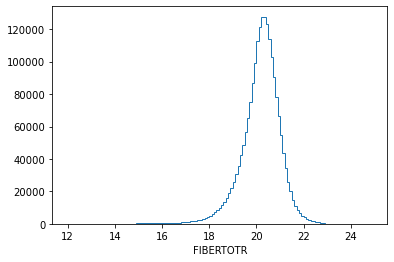

In [51]:
_ = pl.hist(flux2mag(bright, fibertot=True), histtype='step', bins=np.arange(12., 25., 0.1))
pl.xlabel('FIBERTOTR')

In [52]:
brightcut_missed = bgs_any[flux2mag(bgs_any, fibertot=True) < 15.]

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,  2.,
         7., 10., 11.,  4.,  0.,  1.,  0.,  0.]),
 array([10.  , 10.05, 10.1 , 10.15, 10.2 , 10.25, 10.3 , 10.35, 10.4 ,
        10.45, 10.5 , 10.55, 10.6 , 10.65, 10.7 , 10.75, 10.8 , 10.85,
        10.9 , 10.95, 11.  , 11.05, 11.1 , 11.15, 11.2 , 11.25, 11.3 ,
        11.35, 11.4 , 11.45, 11.5 , 11.55, 11.6 , 11.65, 11.7 , 11.75,
        11.8 , 11.85, 11.9 , 11.95, 12.  , 12.05, 12.1 , 12.15, 12.2 ,
        12.25, 12.3 , 12.35, 12.4 , 12.45, 12.5 , 12.55, 12.6 , 12.65,
        12.7 

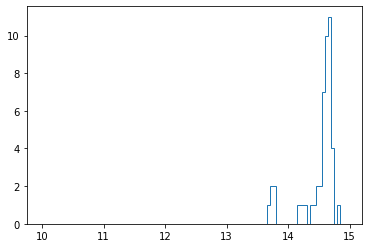

In [53]:
pl.hist(flux2mag(brightcut_missed), histtype='step', bins=np.arange(10., 15., 0.05))

In [54]:
np.mean(np.isin(bright['TARGETID'], faint['TARGETID']))

0.0

In [55]:
np.mean(np.isin(faint['TARGETID'], bright['TARGETID']))

0.0

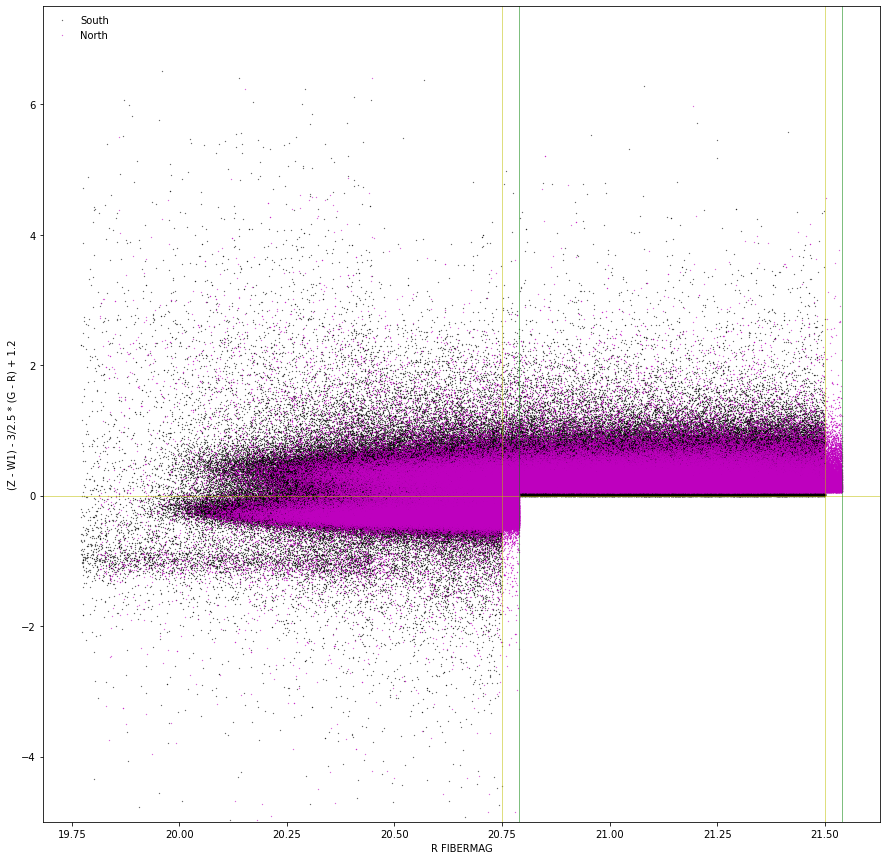

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

north   = faint['PHOTSYS'] == 'N'
south   = faint['PHOTSYS'] == 'S'

ax.plot(flux2mag(faint[south], fiber=True), bgs_faintem(faint[south], sel=False), c='k', marker='.', markersize=.5, lw=0.0, label='South')
ax.plot(flux2mag(faint[north], fiber=True), bgs_faintem(faint[north], sel=False), c='m', marker='.', markersize=.5, lw=0.0, label='North')
ax.axhline(0.0, lw=0.5, c='y')

ax.axvline(21.5,  lw=0.5, c='y')
ax.axvline(21.54, lw=0.5, c='g')

ax.axvline(20.75, lw=0.5, c='y')
ax.axvline(20.79, lw=0.5, c='g')

ax.set_ylim(-5., 7.5)

ax.set_xlabel('R FIBERMAG')
ax.set_ylabel('(Z - W1) - 3/2.5 * (G - R) + 1.2')

ax.legend(frameon=False)

Text(0, 0.5, 'G - rr')

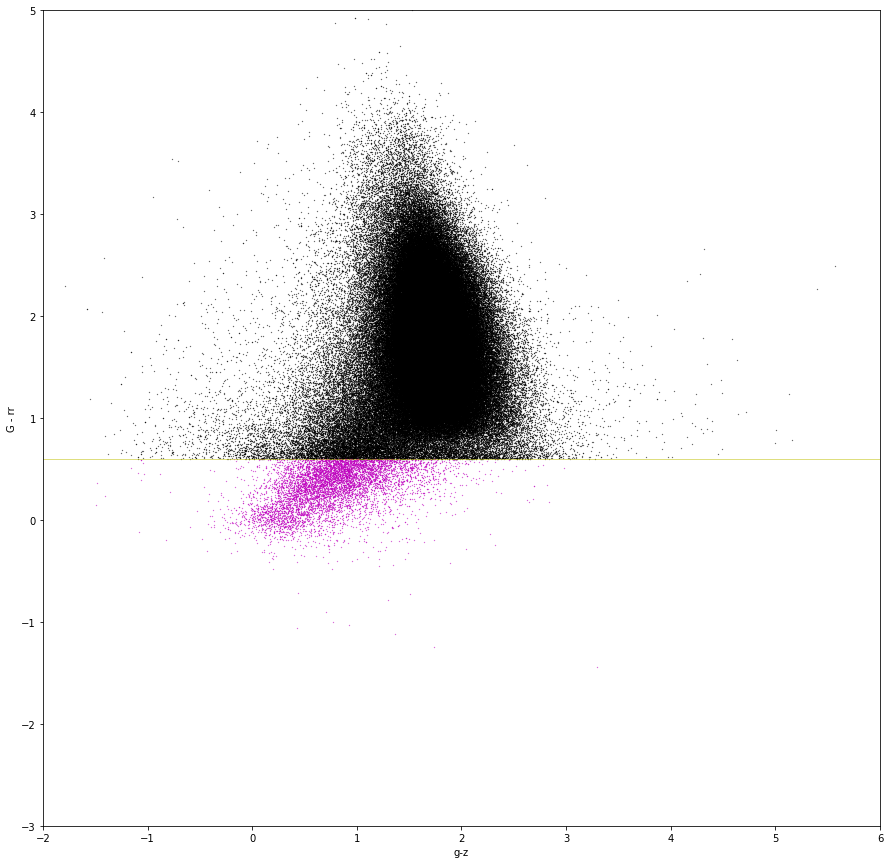

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

cat     = bgs_any

Grr     = cat['GAIA_PHOT_G_MEAN_MAG'] - 22.5 + 2.5*np.log10(1e-16)
ii      = cat['FLUX_R'] > 0.0
Grr[ii] = cat['GAIA_PHOT_G_MEAN_MAG'][ii] - 22.5 + 2.5*np.log10(cat['FLUX_R'][ii])

in_gaia = cat['GAIA_PHOT_G_MEAN_MAG'] > 0.0
galaxy  = Grr > 0.6  

ax.plot(flux2mag(cat, band='G')[in_gaia &  galaxy] - flux2mag(cat, band='Z')[in_gaia &  galaxy], Grr[in_gaia &  galaxy], c='k', marker='.', markersize=.5, lw=0.0)
ax.plot(flux2mag(cat, band='G')[in_gaia & ~galaxy] - flux2mag(cat, band='Z')[in_gaia & ~galaxy], Grr[in_gaia & ~galaxy], c='m', marker='.', markersize=.5, lw=0.0)

ax.axhline(0.6, lw=0.5, c='y')

ax.set_xlim(-2., 6.)
ax.set_ylim(-3., 5.)

ax.set_xlabel('g-z')
ax.set_ylabel('G - rr')

Text(0, 0.5, 'r-z')

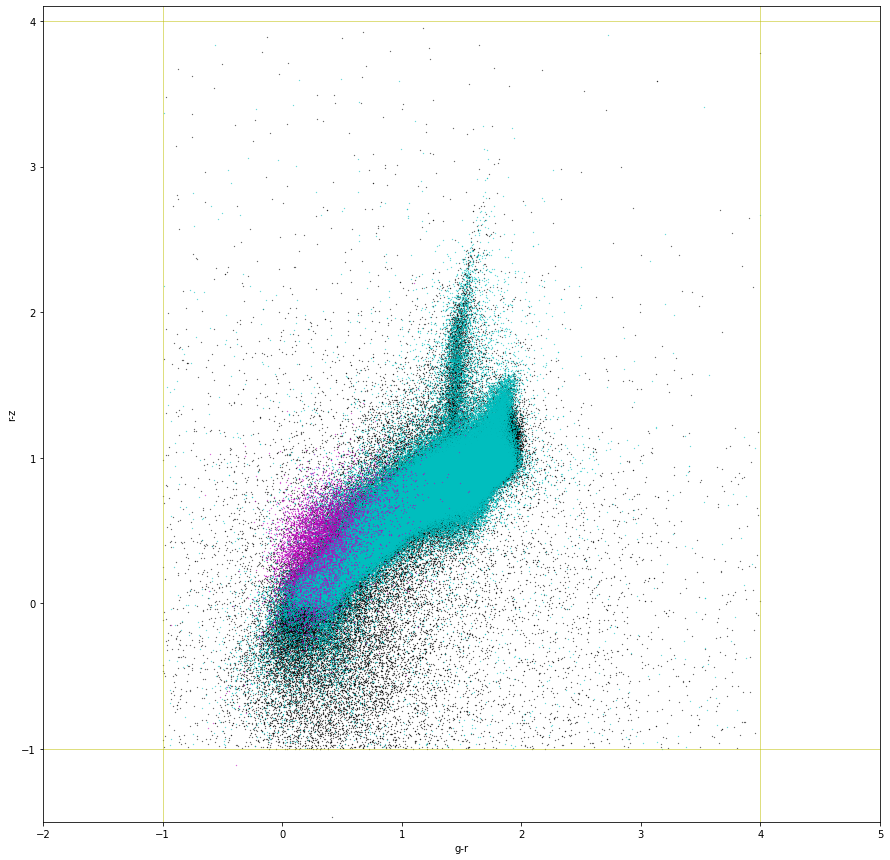

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

for x, color in zip([bright, faint, wise], ['k', 'c', 'm']):
    gmr = flux2mag(x, band='G', fiber=False, fibertot=False) - flux2mag(x, band='R', fiber=False, fibertot=False)
    rmz = flux2mag(x, band='R', fiber=False, fibertot=False) - flux2mag(x, band='Z', fiber=False, fibertot=False)

    ax.plot(gmr, rmz, c=color, marker='.', markersize=.5, lw=0.0)

ax.axvline(-1, lw=0.5, c='y')
ax.axvline( 4, lw=0.5, c='y')

ax.axhline(-1, lw=0.5, c='y')
ax.axhline( 4, lw=0.5, c='y')

ax.set_xlim(-2.0, 5.)
ax.set_ylim(-1.5, 4.1)

ax.set_xlabel('g-r')
ax.set_ylabel('r-z')

Text(0, 0.5, 'Counts per dRTOTFLUX=0.05')

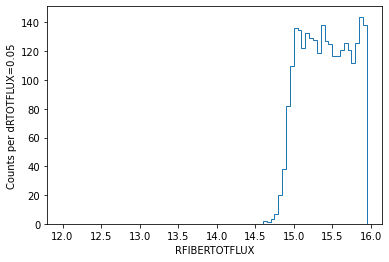

In [59]:
_ = pl.hist(flux2mag(bgs_any, band='R', fiber=False, fibertot=True), bins=np.arange(12., 16., 0.05), histtype='step')

pl.xlabel('RFIBERTOTFLUX')
pl.ylabel('Counts per dRTOTFLUX=0.05')

Text(0, 0.5, 'Counts per $\\Delta r =$0.05')

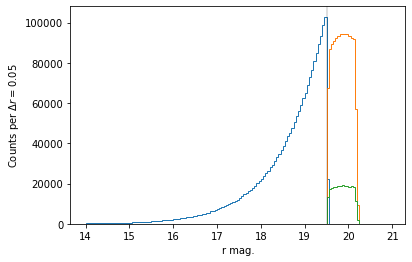

In [60]:
_ = pl.hist(flux2mag(bright, band='R', fiber=False, fibertot=False), bins=np.arange(14., 21., 0.05), histtype='step')
_ = pl.hist(flux2mag(faint,  band='R', fiber=False, fibertot=False), bins=np.arange(14., 21., 0.05), histtype='step')
_ = pl.hist(flux2mag(  hip,  band='R', fiber=False, fibertot=False), bins=np.arange(14., 21., 0.05), histtype='step')

pl.axvline(19.5, c='k', lw=0.25)

pl.xlabel('r mag.')
pl.ylabel(r'Counts per $\Delta r =$0.05')

In [61]:
for photsys in ['N', 'S']:
    isin = faint['PHOTSYS'] == photsys
    
    print(photsys, flux2mag(faint[isin], band='R', fiber=False, fibertot=False).max())

N 20.22
S 20.175


In [62]:
np.unique(bgs_any['REF_CAT'], return_counts=True)

(<Column name='REF_CAT' dtype='bytes2' length=3>
   
 G2
 L3,
 array([2964390,  261703,   44872]))

In [63]:
14629. / 1012126.

0.014453734021258222

In [64]:
14629. / len(bright)

0.007233345480382845

In [65]:
# https://www.legacysurvey.org/dr9/sga/
# SGA: 400,000 galaxies over 20,000 ballpark.
400000. / 20000. 

20.0

In [66]:
0.02 * 860. 

17.2

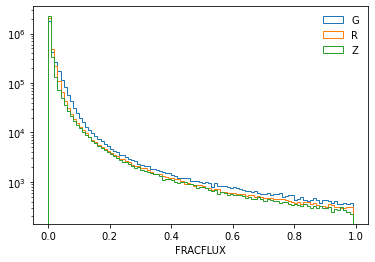

In [67]:
for band in ['G', 'R', 'Z']:
    _ = pl.hist(bgs_any['FRACFLUX_{}'.format(band)], bins=np.arange(0., 1., 0.01), histtype='step', label=band)
    pl.yscale('log')
    pl.xlabel('FRACFLUX')
    pl.legend(frameon=False)

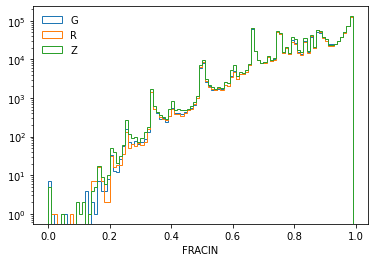

In [68]:
for band in ['G', 'R', 'Z']:
    _ = pl.hist(bgs_any['FRACIN_{}'.format(band)], bins=np.arange(0., 1., 0.01), histtype='step', label=band)
    pl.yscale('log')
    pl.xlabel('FRACIN')
    pl.legend(loc=2, frameon=False)

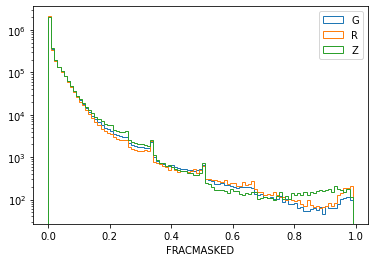

In [69]:
for band in ['G', 'R', 'Z']:
    _ = pl.hist(bgs_any['FRACMASKED_{}'.format(band)], bins=np.arange(0., 1., 0.01), histtype='step', label=band)
    pl.yscale('log')
    pl.xlabel('FRACMASKED')
    pl.legend()

In [70]:
missing_band = bgs_any[(bgs_any['NOBS_G'] == 0) | (bgs_any['NOBS_R'] == 0) | (bgs_any['NOBS_Z'] == 0)]

In [71]:
missing_band

<Table length=20>
RELEASE BRICKID BRICKNAME BRICK_OBJID ... PRIORITY_INIT NUMOBS_INIT HPXPIXEL
                                      ...                                   
 int16   int32    bytes8     int32    ...     int64        int64     int64  
------- ------- --------- ----------- ... ------------- ----------- --------
   9010  516429  3441p340        1542 ...          2100           1    13437
   9010  332503  1738p002         334 ...          2100           1    26981
   9010  412606  2344p142        1830 ...          2100           1     8486
   9010  313961  2183m030        1788 ...          2100           1    25928
   9010  232746  0795m172        1614 ...          2100           1    21190
   9010  443010  2556p197        3929 ...          2100           1    32412
   9010  422063  1603p160        5640 ...          2100           1    27615
   9010  402387  1312p125        1230 ...          2100           1     4279
   9010  382941  2274p090        3367 ...          2100           1     8291
   9010   73936  0975m510        2238 ...          2100           1    39098
   9010  322714  2466m015         819 ...          2100           1    30974
   9010  422063  1603p160        5640 ...          2100           1    27615
   9010  132761  3579m370        3636 ...          2100           1    16417
   9010  124768  3576m387        5154 ...          2100           1    16394
   9010  129312  3576m377         185 ...          2100           1    16416
   9010  128169  3573m380        2926 ...          2100           1    16416
   9010  135079  3586m365        2049 ...          2100           1    16420
   9010  135081  3592m365        4964 ...          2100           1    16398
   9010  127030  3569m382        1802 ...          2100           1    16416
   9010  155367  0016m320        4750 ...          2100           1    16439

In [72]:
for name in bgs_mask.names():
    print('{}\t{}'.format(name.ljust(16), np.count_nonzero((missing_band['BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)))

BGS_FAINT       	20
BGS_BRIGHT      	20
BGS_WISE        	20
BGS_FAINT_HIP   	20
BGS_FAINT_NORTH 	20
BGS_BRIGHT_NORTH	20
BGS_WISE_NORTH  	20
BGS_FAINT_SOUTH 	20
BGS_BRIGHT_SOUTH	20
BGS_WISE_SOUTH  	20


In [73]:
missing_band['REF_CAT']

<Column name='REF_CAT' dtype='bytes2' length=20>
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3
L3

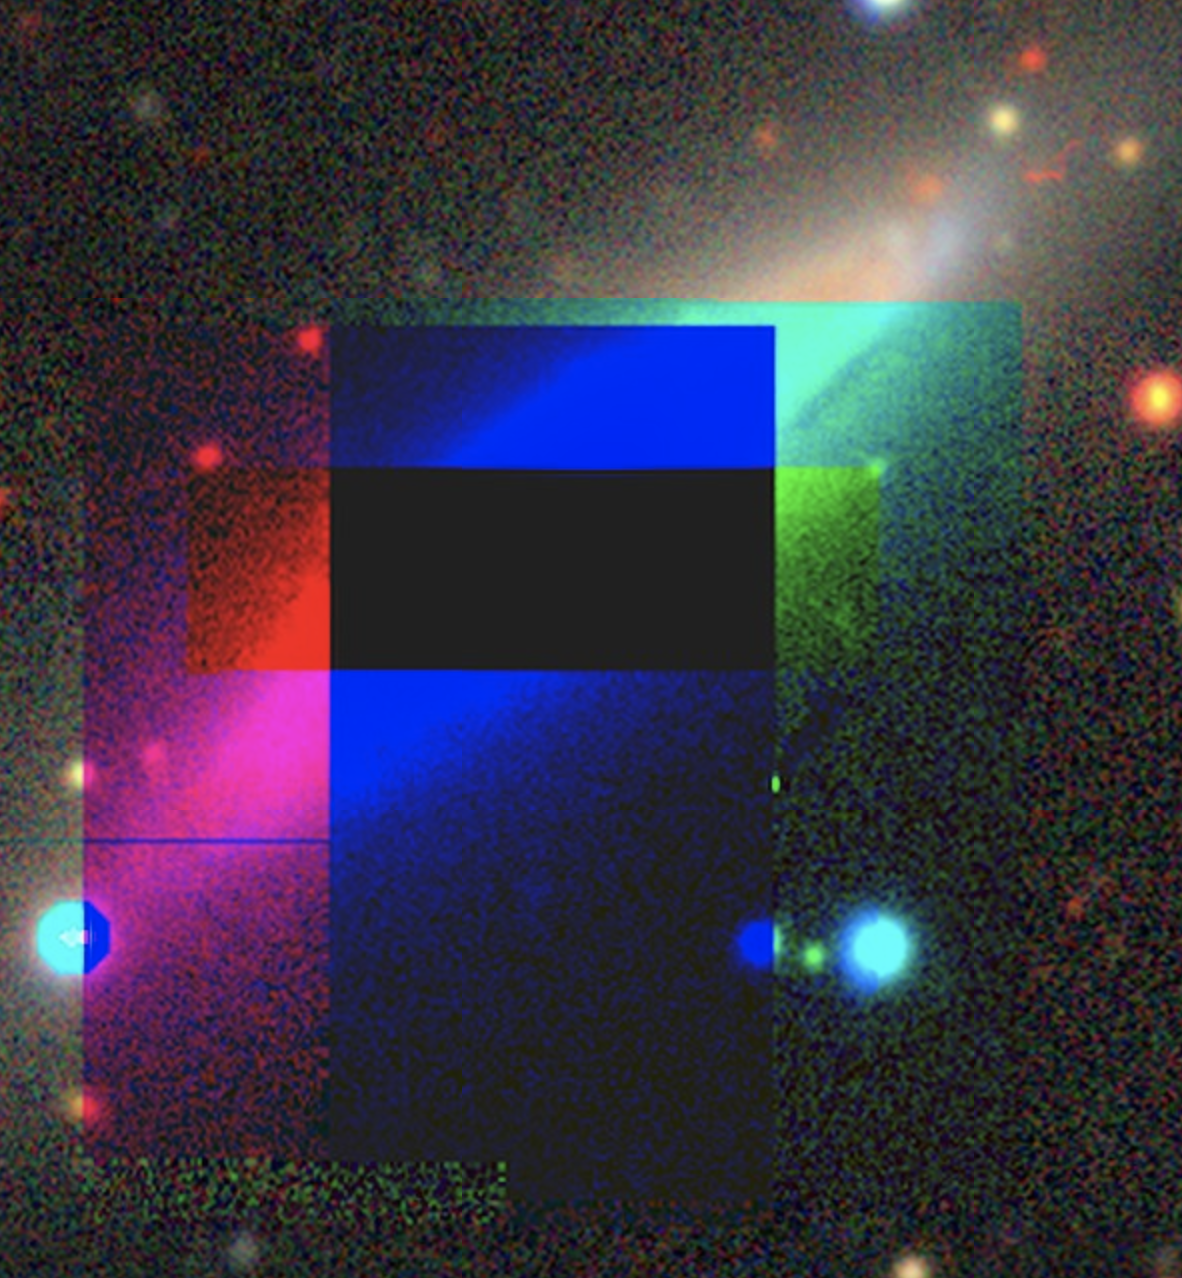

In [74]:
# Promotion rate

In [75]:
len(faint) / len(bgs_any)

0.3795246968402291

In [76]:
540. / (540. + 860.)

0.38571428571428573

In [77]:
faints = np.random.random(len(bgs_any)) < 0.3857
faints 

array([False, False,  True, ..., False, False,  True])

In [78]:
np.mean(faints)

0.38515514534701534

In [79]:
# https://github.com/desihub/desitarget/blob/affc0e2994ce71df9fd4f9f3963c5b0b950d140e/py/desitarget/cuts.py#L88
random_fraction_of_trues?

Signature: random_fraction_of_trues(fraction, bool_array)
Docstring:
Return True for a random subset of array entries that are True.

Parameters
----------
fraction : :class:`float`
    The fraction of the True entries to retain as True. Should be
    between 0 and 1.
bool_array : :class:`array_like` or `bool`
    A boolean array, or scalar.

Returns
-------
:class:`array_like`
    The original `bool_array`, with a random `fraction` of ``True``
    entries retained as ``True`` and the others set to ``False``.
    If a scalar is passed, then a scalar is returned.
File:      /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desitarget/master/py/desitarget/cuts.py
Type:      function


In [80]:
promoted = random_fraction_of_trues(0.2, faints)

In [81]:
np.mean(promoted)

0.07710385161565471

In [82]:
0.3857 * 0.2

0.07714

# Done.